In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dense, Flatten, Conv2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [2]:
path=r'C:\Users\akai7\Deep Learning + Capstone\Deep Learning\Project\dogs_vs_cats\train'
CATEGORY=['cats','dogs']
NAME=f'cat-v-dog-prediction-{int(time.time())}'
tensorboard=TensorBoard(log_dir=f'logs\\{NAME}\\')

In [3]:
img_size=128
data=[]

In [4]:
for category in CATEGORY:
    folder=os.path.join(path,category)
    label=CATEGORY.index(category)
    # print(folder)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
        # print(img_path)
        # plt.imshow(img_arr)
        # break

In [5]:
len(data)

20000

In [6]:
random.seed(42)
random.shuffle(data)

In [7]:
x=[]
y=[]
for features, labels in data:
    x.append(features)
    y.append(labels)
x=np.array(x)
y=np.array(y)

In [8]:
pickle.dump(x,open('features.pkl','wb'))
pickle.dump(y,open('labels.pkl','wb'))

In [9]:
print(y)

[0 0 1 ... 0 0 0]


In [10]:
x=x/255.0

In [11]:
x.shape

(20000, 128, 128, 3)

In [12]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(96,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

In [13]:
model.add(Dense(192,input_shape=x.shape[1:],activation='relu'))
model.add(Dense(2,activation='softmax'))

C:\Users\akai7\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(x, y, epochs=5, validation_split=0.15, batch_size=32, callbacks=[tensorboard])

KeyboardInterrupt: 

In [ ]:
# model.save('saved_models/CNN_model.h5')
model.save('saved_models/CNN_model.keras')

# Predictions

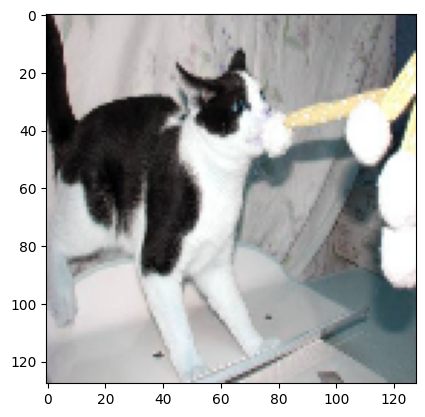

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
Predicted probabilities: [[0. 1.]]


In [6]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

path2 = r'C:\Users\akai7\Deep Learning + Capstone\Deep Learning\Project\dogs_vs_cats\test'
CATEGORY2 = ['cats', 'dogs']
data2 = []
img_size = 128 

# Load the trained model
model = load_model('saved_models/CNN_model.keras')

for category2 in CATEGORY2:
    folder2 = os.path.join(path2, category2)
    label2 = CATEGORY2.index(category2)
    for img2 in os.listdir(folder2):
        img_path2 = os.path.join(folder2, img2)
        img_arr2 = cv2.imread(img_path2)
        img_arr2 = cv2.resize(img_arr2, (img_size, img_size))
        data2.append([img_arr2])

idx2 = random.randint(0, len(data2))
plt.imshow(data2[idx2][0])
plt.show()

# Perform prediction on the selected image
y_pred = model.predict(data2[idx2][0].reshape(1, img_size, img_size, 3))
print("Predicted probabilities:", y_pred)


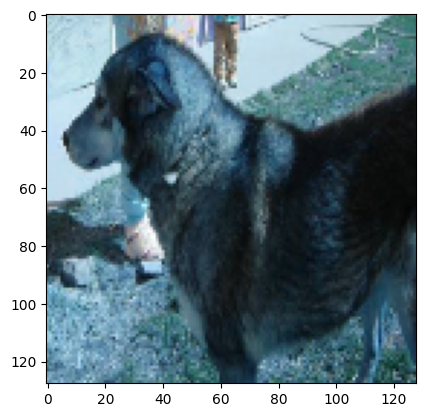

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted class: dogs
Predicted probabilities: [[0. 1.]]


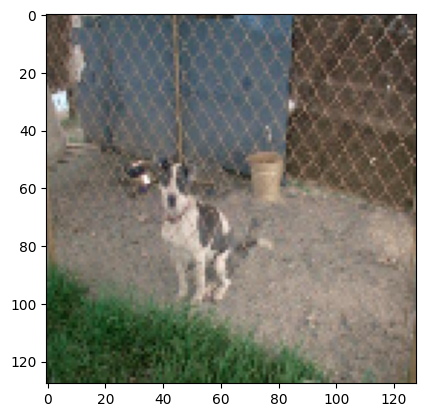

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: dogs
Predicted probabilities: [[2.191491e-34 1.000000e+00]]


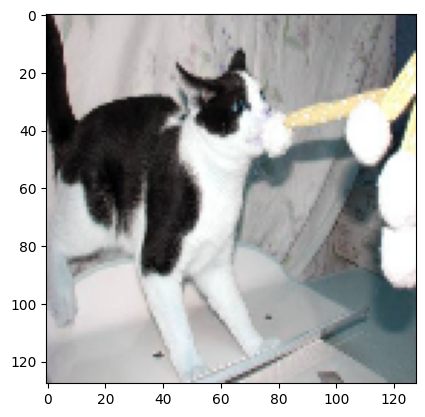

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: dogs
Predicted probabilities: [[0. 1.]]


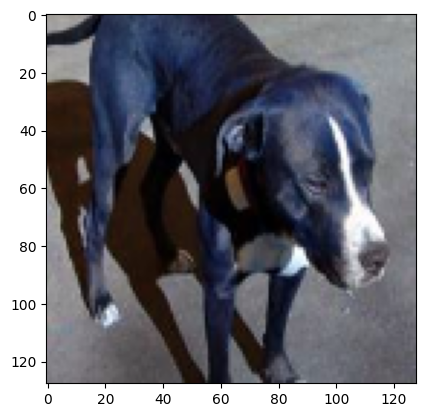

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted class: dogs
Predicted probabilities: [[0. 1.]]


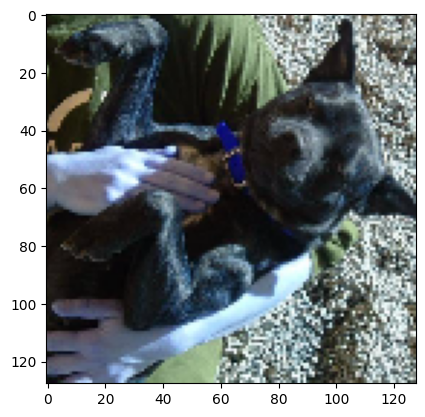

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: dogs
Predicted probabilities: [[0. 1.]]


In [8]:
# Load the trained model
model = load_model('saved_models/CNN_model.keras')

# Generate and predict on 5 random images
for _ in range(5):
    idx2 = random.randint(0, len(data2) - 1)
    plt.imshow(data2[idx2][0])
    plt.show()

    # Perform prediction on the selected image
    image_to_predict = cv2.resize(data2[idx2][0], (img_size, img_size))  # Resize the image
    image_to_predict = np.expand_dims(image_to_predict, axis=0)  # Add batch dimension
    prediction = model.predict(image_to_predict)

    # Get the predicted class (0 for cat, 1 for dog)
    predicted_class = np.argmax(prediction)
    predicted_label = CATEGORY2[predicted_class]

    print("Predicted class:", predicted_label)
    print("Predicted probabilities:", prediction)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 192)                 │       3,612,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,414,726 (28.28 MB)

 Trainable params: 3,707,362 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,707,364 (14.14 MB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pickle


x_test  = pickle.load(open('features.pkl', 'rb'))
y_test = pickle.load(open('labels.pkl', 'rb'))
CATEGORY = ['cats', 'dogs']

predictions = loaded_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


print(classification_report(y_test, predicted_classes))


cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(CATEGORY))
plt.xticks(tick_marks, CATEGORY)
plt.yticks(tick_marks, CATEGORY)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
